*** EDA in Blockchain data

In [176]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import community as cmnty
import os
import networkx as nx

from matplotlib.colors import LinearSegmentedColormap

In [177]:
from matplotlib.colors import LinearSegmentedColormap
custom_palette = ['#0671B7','#67A3D9', '#C8E7F5','#e1e1ff', '#F6D2E0','#F8B7CD', '#e19bcd']

sns_palette = sns.color_palette(custom_palette)
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", sns_palette)

In [178]:
# Get the folder location where the data is located.
data_folder = '/home/sunilkarki/Documents/Persn/CProj/bnp/data'

# Get a list of all CSV files in the folder.
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

print(csv_files)

['transactions2.csv', 'transactions1 copy.csv', 'transactions3.csv', 'transactions4.csv', 'transactions5.csv', 'transactions1.csv', 'transactions6.csv']


In [179]:
# Initialize a dataframe to store the combined blockchain data
block_df = pd.DataFrame()

for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(file_path)
    block_df = pd.concat([block_df, df], ignore_index=True)


In [180]:
# file_path = os.path.join(data_folder, 'transactions1.csv')
# block_df = pd.read_csv(file_path)

In [181]:
# datetime = datetime.fromtimestamp(123456678)
# block_df['Timestamp'] = pd.to_datetime(block_df['Timestamp'])

In [182]:
# Display the first head rows of the combined dataframe
block_df.head()

,Block Number,Transaction Hash,From,To,Value (ETH),Timestamp
0,17140933,0x537419de48391a94672c1c808e65a3902f2544049a91...,0xd108FD0E8c8E71552a167E7a44FF1d345D233BA6,0x6Ee35B2CcF20dc46Cf4a58E591979E2fB8e5D2BC,51300000000000000,2023-04-28 05:45:59
1,17140933,0x28db4878574d406669a8558664849ab305dd6bc27eed...,0x151B381058f91cF871E7eA1eE83c45326F61e96D,0xd47c75c6788627c8Bc6C53e50e85d97f8bf2f0C6,21500000000000000,2023-04-28 05:45:59
2,17140933,0xb9a04410f7de73b9d36849589a7dc90b07e9a4e172b9...,0x8665379ecfD094c1525ea5ED0Ee4eFfB42067e02,0xae0Ee0A63A2cE6BaeEFFE56e7714FB4EFE48D419,7741308412820591,2023-04-28 05:45:59
3,17140933,0xf7c680409808f387e7ae8997b9413565e2f03cb2cc24...,0x852dc1c875F0117EA0808610010893E4C576B6A9,0x737a5ffA3901249FC41A1219fd84254D35b53A89,319887749650826700,2023-04-28 05:45:59
4,17140933,0xc03e40b55d215898fe860dabd12a2e840b79d95e23df...,0xD2f41167a391014Bc5df2234BE7f3a64a06a9fD7,0x73d1577b2DdE0243313dA83f148Af8B31C4bEc5d,5000000000000000,2023-04-28 05:45:59


In [183]:
# create new dataframe to check the block_df columns and its datatype
columns_data_types_df = pd.DataFrame({'Column Name': block_df.columns, 'Data Type': block_df.dtypes.values})

# This will again be checked after cleaning the data

# Display the new DataFrame
columns_data_types_df

,Column Name,Data Type
0,Block Number,int64
1,Transaction Hash,object
2,From,object
3,To,object
4,Value (ETH),object
5,Timestamp,object


Check for missing values

In [184]:
# Check for missing values
block_df.isnull().sum()

Block Number        0
Transaction Hash    0
From                0
To                  0
Value (ETH)         0
Timestamp           0
dtype: int64

In [185]:
# Rename the column
block_df.rename(columns={'Value (ETH)': 'ETH'}, inplace=True)

In [186]:
max_value = block_df['ETH'].max()
min_value = block_df['ETH'].min()

print(f"Maximum value in column 'ETH': {max_value}")
print(f"Minimum value in column 'ETH': {min_value}")

Maximum value in column 'ETH': 9998747411269587792
Minimum value in column 'ETH': 100000000000000


Data Cleaning

In [187]:
block_df.ETH =  block_df.ETH.astype(float)

In [188]:
# Clean the ethereum value column.

# Divide the column 'ETH' by the eth value 1000000000000000000,
# which gives the actual ETH value transferred in the transactions.
block_df['ETH'] = block_df['ETH'].div(1000000000000000000).round(4)

In [189]:
# create new dataframe to check the block_df columns and its datatype
columns_data_types_df = pd.DataFrame({'Column Name': block_df.columns, 'Data Type': block_df.dtypes.values})

# Display the new DataFrame
columns_data_types_df

,Column Name,Data Type
0,Block Number,int64
1,Transaction Hash,object
2,From,object
3,To,object
4,ETH,float64
5,Timestamp,object


In [190]:
# Summary statistics of numerical columns
block_df.describe()

,Block Number,ETH
count,4.377000e+03,4377.000000
mean,1.714096e+07,1.328858
std,2.048814e+01,17.848482
min,1.714093e+07,0.000000
25%,1.714094e+07,0.015000
50%,1.714096e+07,0.065600
75%,1.714098e+07,0.259600
max,1.714100e+07,880.096500


Histogram of 'Value (ETH)'

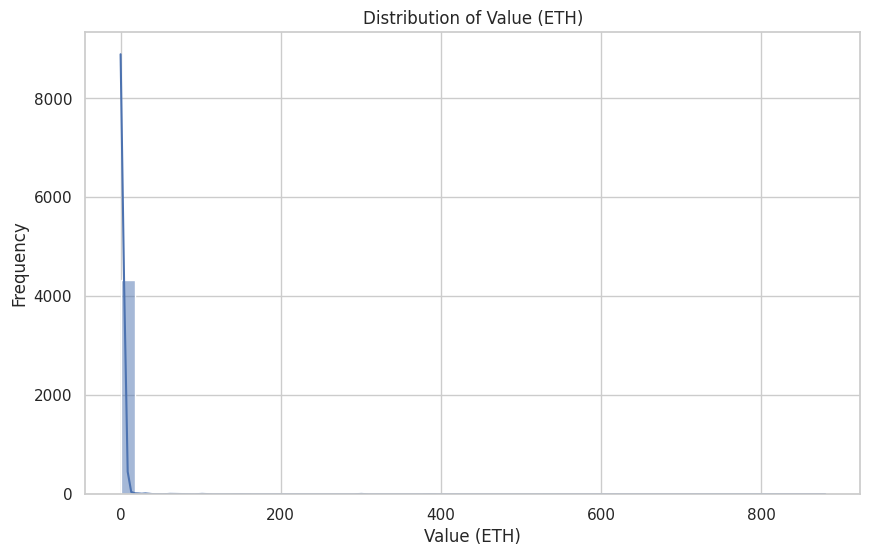

In [191]:
# Histogram of 'Value (ETH)'
plt.figure(figsize=(10, 6))
sns.histplot(block_df['ETH'], bins=50, kde=True)
plt.title('Distribution of Value (ETH)')
plt.xlabel('Value (ETH)')
plt.ylabel('Frequency')
plt.show()

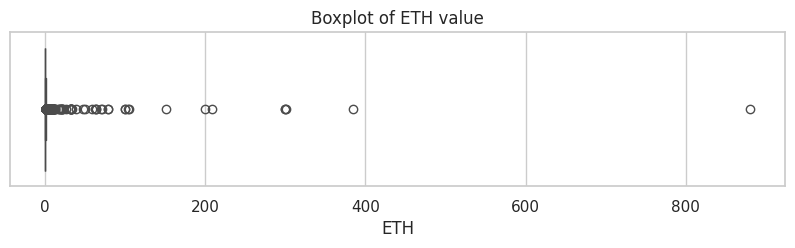

In [192]:
# Boxplot to identify outliers in 'Value (ETH)'
plt.figure(figsize=(10, 2))
sns.boxplot(x=block_df['ETH'])
plt.title('Boxplot of ETH value')
plt.show()

In [193]:
# Time series plot of transactions over time
# block_df['Timestamp'] = pd.to_datetime(block_df['Timestamp'], unit='s')
block_df['Timestamp'] = pd.to_datetime(block_df['Timestamp'])
# block_df['Datetime'] = pd.to_datetime(block_df['Timestamp'],
#                                   unit='s')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='ETH', data=block_df)
plt.title('Transaction Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('ETH')
plt.show()

ValueError: time data "1682640023" doesn't match format "%Y-%m-%d %H:%M:%S", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [194]:
block_df['Timestamp']

0       2023-04-28 05:45:59
1       2023-04-28 05:45:59
2       2023-04-28 05:45:59
3       2023-04-28 05:45:59
4       2023-04-28 05:45:59
               ...         
4372    2023-04-28 05:58:47
4373    2023-04-28 05:58:47
4374    2023-04-28 05:58:47
4375    2023-04-28 05:58:47
4376    2023-04-28 05:58:47
Name: Timestamp, Length: 4377, dtype: object

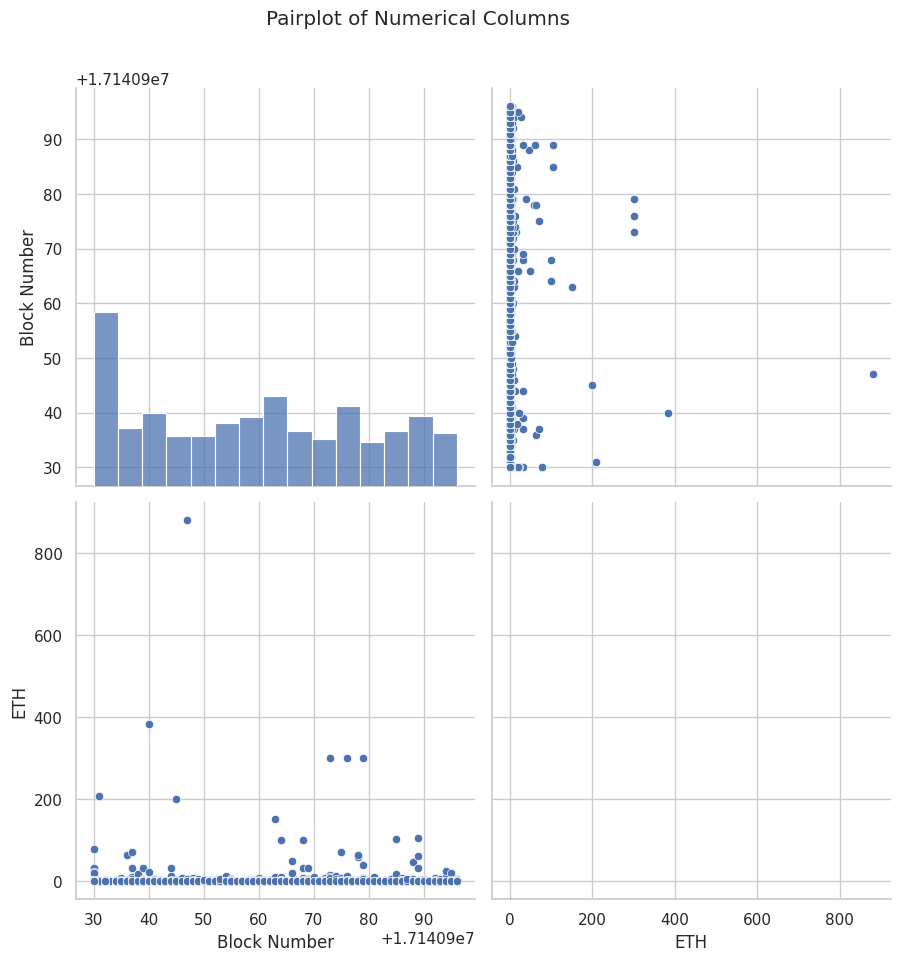

In [195]:
# Pairplot to visualize relationships between numerical columns
# plt.figure(figsize=(10, 2))
prplt = sns.pairplot(block_df)
prplt.fig.set_figheight(10)
prplt.fig.set_figwidth(10)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

In [196]:
# Find the unique values in each column
for column in block_df.columns:
    unique_values_count = block_df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values_count}")

Number of unique values in Block Number: 67
Number of unique values in Transaction Hash: 4081
Number of unique values in From: 2811
Number of unique values in To: 2072
Number of unique values in ETH: 1651
Number of unique values in Timestamp: 67


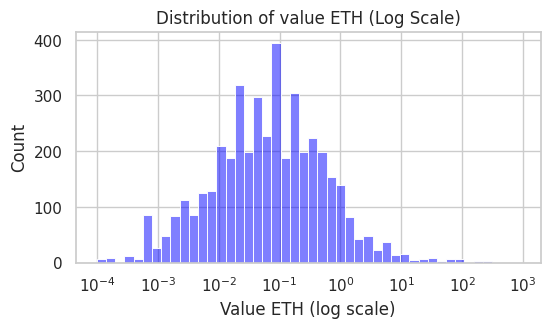

In [197]:
sns.set(style="whitegrid")

# Logarithmic scale for 'Value ETH'
plt.figure(figsize=(6, 3))
sns.histplot(block_df['ETH'], kde=True, color='blue', log_scale=True)
plt.title('Distribution of value ETH (Log Scale)')
plt.xlabel('Value ETH (log scale)')
plt.ylabel('Count')
plt.show()

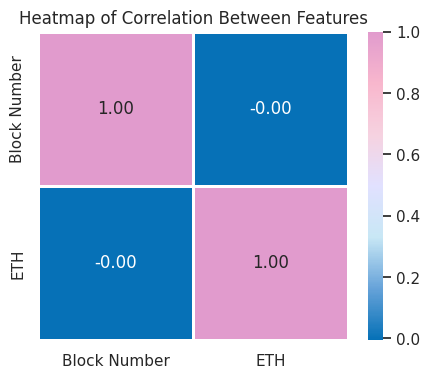

In [198]:
# Find numerical columns in the dataframe for correlation
numeric_columns = []
for column_name, data_type in block_df.dtypes.items():
    if pd.api.types.is_numeric_dtype(data_type):
        numeric_columns.append(column_name)
        # print(f"{column_name} : {data_type}")

correlation_matrix = block_df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=2)
plt.title('Heatmap of Correlation Between Features')
plt.show()

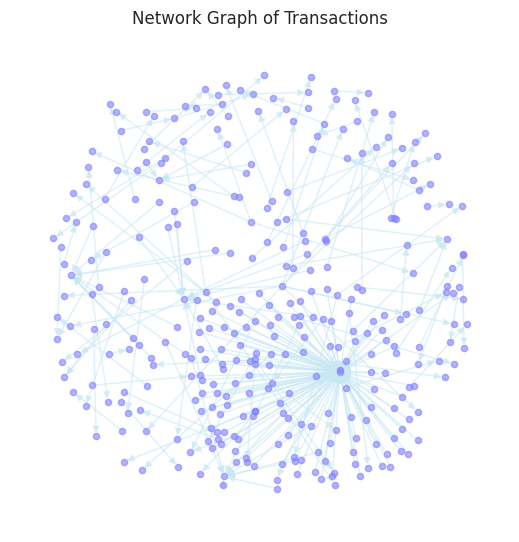

In [ ]:
G = nx.from_pandas_edgelist(block_df, 'From', 'To', create_using=nx.DiGraph())

# Draw the network graph
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, node_size=20, alpha=0.6, edge_color='#C8E7F5', node_color='#7f7fff', with_labels=False)
plt.title('Network Graph of Transactions')
plt.show()

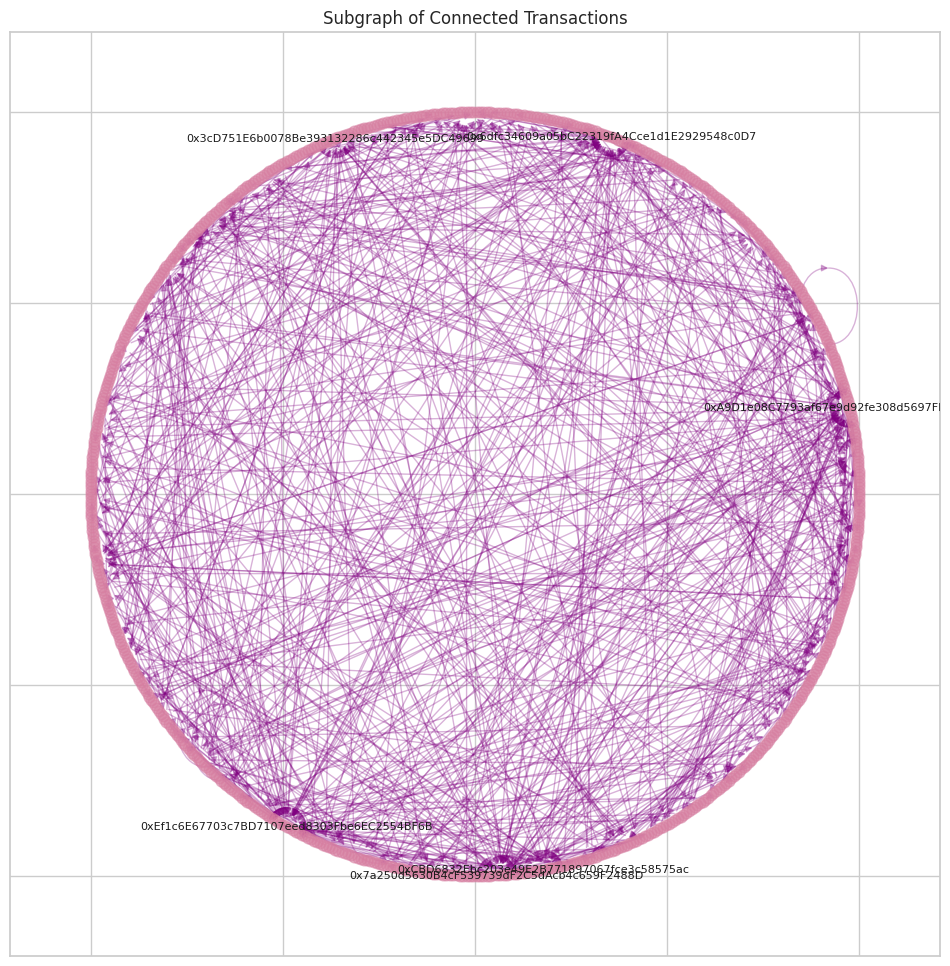

In [204]:
G = nx.from_pandas_edgelist(block_df,
                            source='From',
                            target='To',
                            edge_attr=True,
                            create_using=nx.DiGraph())

# Filter nodes with a degree greater than a threshold 'x'
degree_threshold = 1  # Replace 'x' with your chosen threshold for minimum connections
nodes_to_keep = [node for node, degree in G.degree() if degree > degree_threshold]

# Create a subgraph with only these nodes
H = G.subgraph(nodes_to_keep)

# Use tree layout if the graph is a tree. If not a tree, use shell layout
try:
    pos = nx.drawing.nx_agraph.graphviz_layout(H, prog='dot')
except:
    pos = nx.shell_layout(H)

node_size = 60
high_degree_nodes = [node for node, degree in H.degree() if degree > 20]  # threshold(degree)

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(H, pos, node_size=node_size, node_color='#D77FA1', alpha=0.5)
nx.draw_networkx_edges(H, pos, edge_color='purple', alpha=0.3)
nx.draw_networkx_labels(H, pos, labels={n: n for n in high_degree_nodes}, font_size=8)
plt.title('Subgraph of Connected Transactions')
# plt.axis('off')
plt.show()